# Multiple Linear Regression - Ecnomic_Unemployment_rate Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("economic_index.csv")

In [3]:
df.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [11]:
df.shape

(24, 3)

In [5]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df.head(3)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357


In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


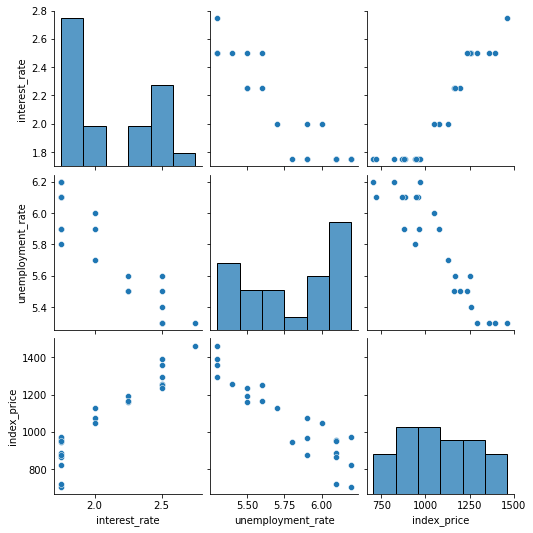

In [66]:
#seaborn visualization
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

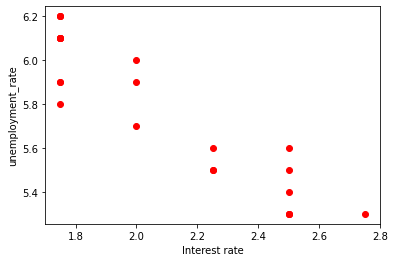

In [69]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment_rate")

In [17]:
#split into independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [21]:
y.head

<bound method NDFrame.head of 0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64>

In [24]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

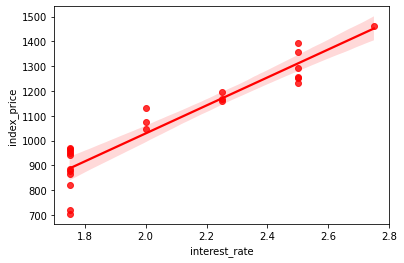

In [68]:
sns.regplot(df['interest_rate'],df['index_price'],color='r')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

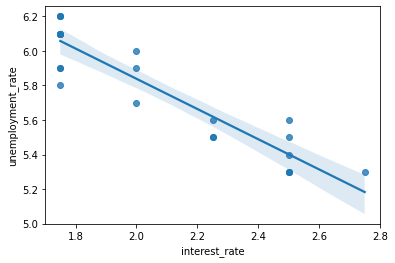

In [30]:
sns.regplot(df['interest_rate'],df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

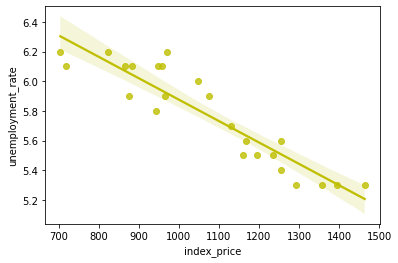

In [73]:
sns.regplot(df['index_price'],df['unemployment_rate'],color='y')

In [33]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [35]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

# Model Building

In [38]:
#Model fitting
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [41]:
#cross_validation
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [42]:
np.mean(validation_score)

-5914.828180162386

In [43]:
## prediction
y_pred=regression.predict(X_test)

In [44]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [62]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [64]:
print(regression.intecept_)

1053.4444444444443


In [77]:
## Performance Metrics
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("root_mse :",rmse)
print("mean_squared_error :",mse)
print("mean_absolute_error :",mae)

root_mse : 76.11677139574805
mean_squared_error : 5793.762887712569
mean_absolute_error : 59.935781523235484


In [78]:
score=r2_score(y_test,y_pred)
print("R_square score:",score)
#display adjusted R-squared
print("Adj_r2 :",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R_square score: 0.8278978091457145
Adj_r2 : 0.7131630152428576


# ASSUMPTIONS

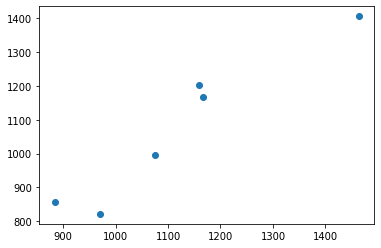

In [54]:
plt.scatter(y_test,y_pred)

# Residuals

In [56]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


C:\Users\kamal\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


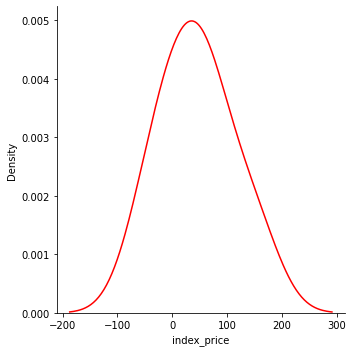

In [74]:
## Plot this residuals
sns.displot(residuals,kind='kde',color='r')

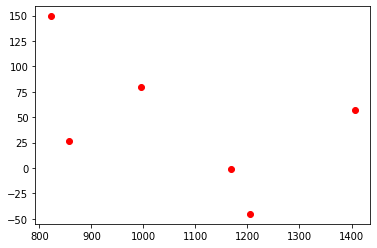

In [76]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals,color='r')

# OLS LINEAR REGRESSION

In [60]:
## OLS Linear Regression
model=sm.OLS(y_train,X_train).fit()

In [61]:
model.summary()

C:\Users\kamal\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                       0.754
Time:                        20:15:17   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""